In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
'''
Загрузите файл HR.csv в pandas dataframe
'''

hr = pd.read_csv('HR.csv', sep=',')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
'''
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
'''


def describe_main(df):
    result = pd.concat([df.describe(percentiles=[]), df.mode(numeric_only=True)[:1]])
    result = result.rename(index={0: 'mode'})
    result = pd.concat([result, df.median(numeric_only=True).to_frame().T])
    result = result.rename(index={0: 'median'})
    display(result )
    return


describe_main(hr)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000


<Axes: >

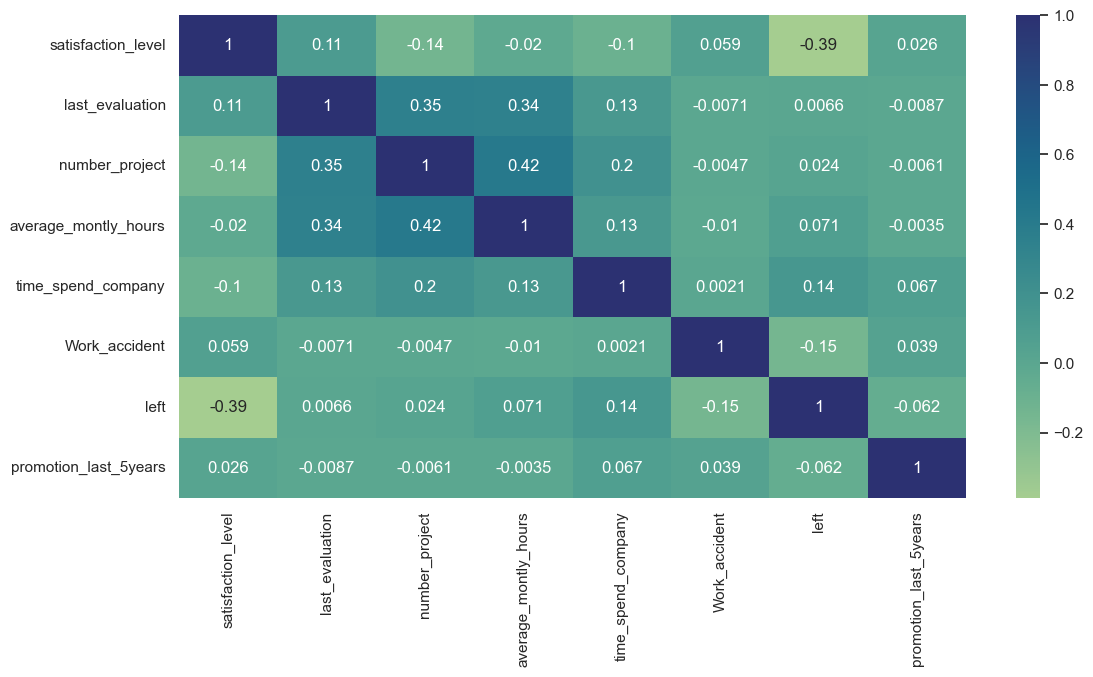

In [ ]:
'''
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные
'''


import seaborn as sns


sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(hr[hr.describe().columns].corr(), annot=True, cmap='crest')


In [ ]:
'''
Самые скоррелированные:
average_montly_hours и number_project
last_evaluation и number_project

Наименее скоррелированные:
left и satisfaction_level
left и Work_accident
'''

In [ ]:
'''
Рассчитайте сколько сотрудников работает в каждом
департаменте
'''


hr['department'].value_counts()


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: ylabel='salary'>

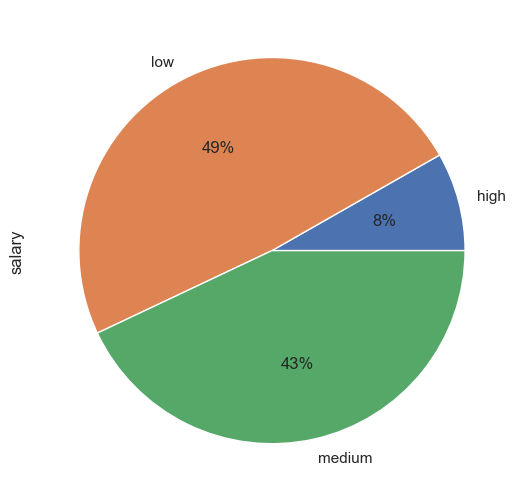

In [ ]:
'''
Показать распределение сотрудников по зарплатам.
'''


hr.groupby('salary')['salary'].count().plot(kind='pie', autopct='%1.0f%%')


In [ ]:
'''
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
'''


hr_ = hr.groupby([hr['department'],hr['salary']])[['salary']].count()
hr_.head().iloc[:3]


salary
department salary        
IT         high        83
           low        609
           medium     535

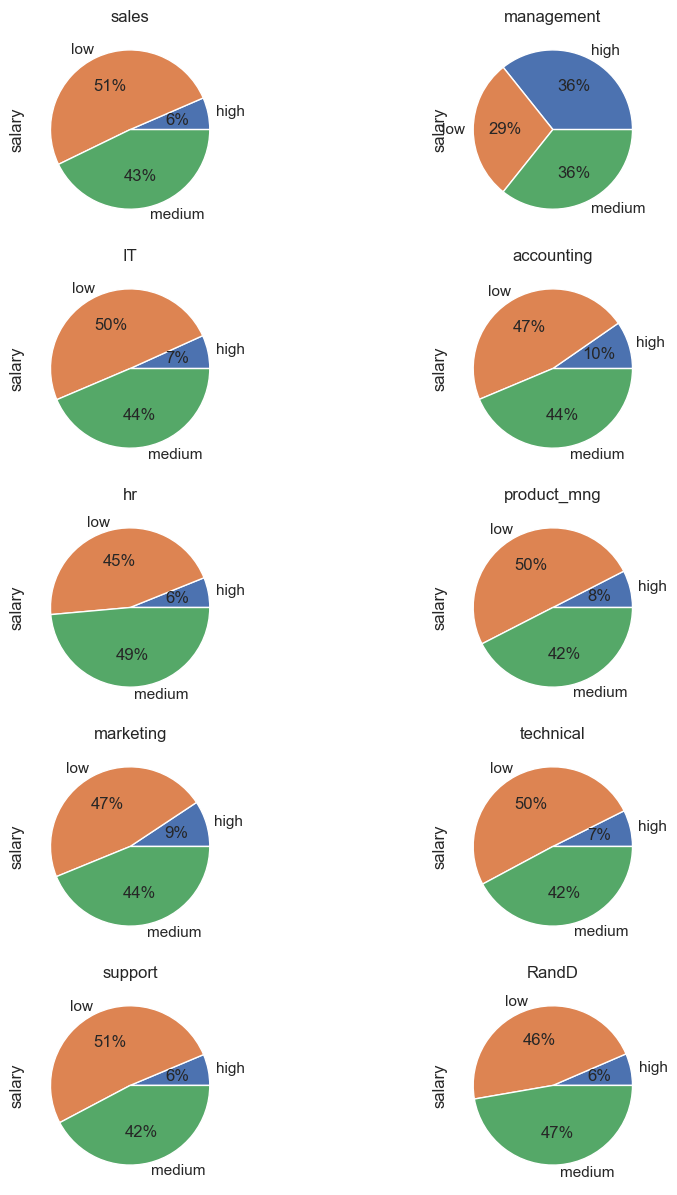

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(10,15)


i = 0
for d in hr['department'].unique():
    hr_.loc[(d)]['salary'].plot(ax=axes[i%5][i%2], kind='pie', title=d, autopct='%1.0f%%')
    i += 1


In [ ]:
'''
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени,
чем сотрудники с низким окладом
'''


A = hr.loc[hr['salary'] == 'high']['average_montly_hours']
B = hr.loc[hr['salary'] == 'low']['average_montly_hours']


stat, p = st.ttest_ind(A, B)
if p > 0.05:
    print("Не отклоняем нулевую гипотезу")
else:
    print("Отклоняем нулевую гипотезу")

print(stat, p)

Не отклоняем нулевую гипотезу
-0.7288680398062308 0.4661023478267259


In [ ]:
A.info()

<class 'pandas.core.series.Series'>
Int64Index: 1237 entries, 72 to 14980
Series name: average_montly_hours
Non-Null Count  Dtype
--------------  -----
1237 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


(array([0.00076647, 0.00153294, 0.00122635, 0.00084311, 0.00107305,
        0.00122635, 0.00099641, 0.00145629, 0.00084311, 0.00076647,
        0.00084311, 0.00099641, 0.0011497 , 0.00030659, 0.00137964,
        0.0011497 , 0.00176288, 0.00574851, 0.00206946, 0.00544192,
        0.00774132, 0.01080719, 0.00766468, 0.0034491 , 0.00988743,
        0.00912096, 0.00850779, 0.00482875, 0.00988743, 0.01111378,
        0.01050061, 0.00973414, 0.00375569, 0.00988743, 0.01019402,
        0.01042396, 0.00298922, 0.00574851, 0.00528863, 0.00620839,
        0.0072048 , 0.0036024 , 0.00429222, 0.00674491, 0.00551857,
        0.00613174, 0.00352575, 0.00582515, 0.00643833, 0.00636168,
        0.00268264, 0.00505869, 0.00482875, 0.00620839, 0.00421557,
        0.00252934, 0.00605509, 0.00528863, 0.00498204, 0.00252934,
        0.00482875, 0.00528863, 0.00551857, 0.00467545, 0.0024527 ,
        0.00498204, 0.00505869, 0.00544192, 0.00728144, 0.00260599,
        0.00559521, 0.00789462, 0.0070515 , 0.00

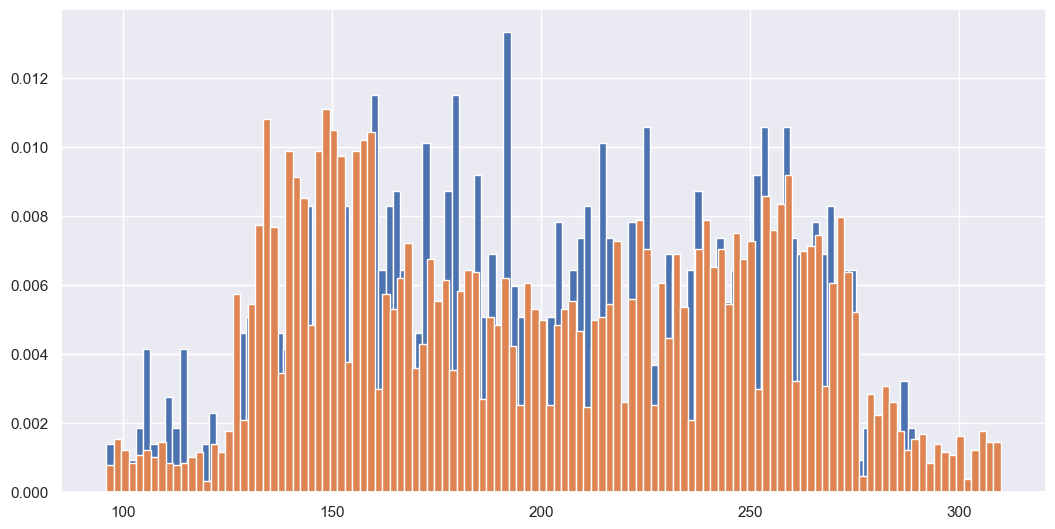

In [ ]:
plt.hist(A, bins=120, density=True)
plt.hist(B, bins=120, density=True)

In [ ]:
'''
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

Доля сотрудников с повышением за последние 5 лет

Средняя степень удовлетворенности

Среднее количество проектов
'''

hr_left = hr.loc[hr.left == 1]
hr_no_left = hr.loc[hr.left == 0]





In [ ]:
len(hr_left.loc[hr_left.promotion_last_5years == 1])/len(hr_left)

0.005320638476617194

In [ ]:
len(hr_no_left.loc[hr_no_left.promotion_last_5years == 1])/len(hr_no_left)

0.026251312565628283

In [ ]:
hr_left.satisfaction_level.mean()

0.4400980117614114

In [ ]:
hr_no_left.satisfaction_level.mean()

0.666809590479524

In [ ]:
hr_left.number_project.mean()

3.8555026603192384

In [ ]:
hr_no_left.number_project.mean()

3.786664333216661

In [ ]:
'''
Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки
'''


from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hr.loc[:, ~hr.columns.isin(['department', 'salary', 'left'])] , hr.left,random_state=42)


X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
14480,0.38,0.86,6,139,6,0,0
1934,0.78,0.93,4,225,5,0,0
7900,0.56,0.71,5,243,3,0,0
2952,0.96,0.62,4,217,2,0,0
4367,0.83,0.53,3,211,4,1,0
...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0
13418,0.49,0.65,4,233,7,0,0
5390,0.66,0.73,5,249,2,0,0
860,0.79,1.00,4,218,5,0,0


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [ ]:
print(model.coef_)
print(model.intercept_)

[[-4.58366087e+00  6.57019075e-01 -2.18430857e-01  4.47682750e-03
   2.22165799e-01 -1.04525663e+00 -1.10730495e+00]]
[0.15265168]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
model.score(X_test, y_test)

0.7536

In [ ]:
accuracy_score(y_test, y_pred)

0.7536